In [15]:
'''
Hãy xác định số object trong ảnh. Yêu cầu: xây dựng một chuỗi xử lý chung cho tất cả các ảnh, 
sử dụng cùng bộ giá trị tham số (nếu có). Hãy chọn chuỗi xử lý cùng các giá trị tham số 
sao cho kết quả thu được trên các ảnh là tốt nhất.
'''

'\nHãy xác định số object trong ảnh. Yêu cầu: xây dựng một chuỗi xử lý chung cho tất cả các ảnh, \nsử dụng cùng bộ giá trị tham số (nếu có). Hãy chọn chuỗi xử lý cùng các giá trị tham số \nsao cho kết quả thu được trên các ảnh là tốt nhất.\n'

In [16]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import torchvision
import numpy as np
from torchvision import transforms
from PIL import Image

In [17]:
image = Image.open('Proj1.2/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png')
w,h =image.size
print(f'Width: {w}, Height: {h}')
print(type(image))

Width: 461, Height: 461
<class 'PIL.PngImagePlugin.PngImageFile'>


In [18]:


def readImage(path: 'str', size: 'tuple' = (224, 224)) -> 'Tensor':
    '''Return a Tensor in shape C x H x W, normalized.'''
    img = Image.open(path)

    transform = transforms.Compose([
        # transforms.Resize(size),
        transforms.PILToTensor()
    ])
    return transform(img)/255

def show(imgs: 'Tensor | list[Tensor]'):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(len(imgs) * 4, 4))
    for i, img in enumerate(imgs):
        # img = img.detach()
        img = torchvision.transforms.functional.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.show()

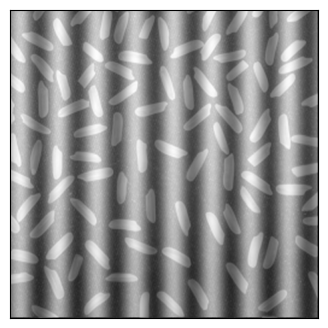

In [19]:
list_path = ['Proj1.2/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png', 'Proj1.2/1_wIXlvBeAFtNVgJd49VObgQ.png', 'Proj1.2/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png', 'Proj1.2/1_zd6ypc20QAIFMzrbCmJRMg.png']
img1 = readImage(list_path[0])
show(img1)
img2 = readImage(list_path[1])
img3 = readImage(list_path[2])
img4 = readImage(list_path[3])
img_list = [img1, img2, img3, img4]

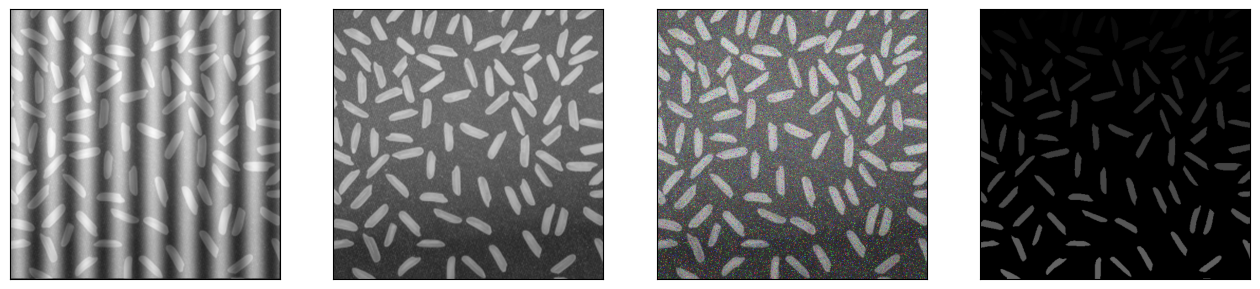

In [20]:
show(img_list)

In [21]:
# image = img_list[1]
# image_np = image.permute(1,2,0).numpy()                      # type(H,W,C)
# image_np = np.clip(image_np * 255, 0, 255).astype(np.uint8)  # OpenCV often require image as this type

In [22]:
# contrast_fac = 1.5
# brightness_fac = 40
# adjusted_np_image =  cv2.convertScaleAbs(image_np, alpha=contrast_fac, beta=brightness_fac)
# adjusted_tensor = torch.from_numpy(adjusted_np_image).permute(2, 0, 1)  # Convert back to (C, H, W) format

# show(adjusted_tensor)

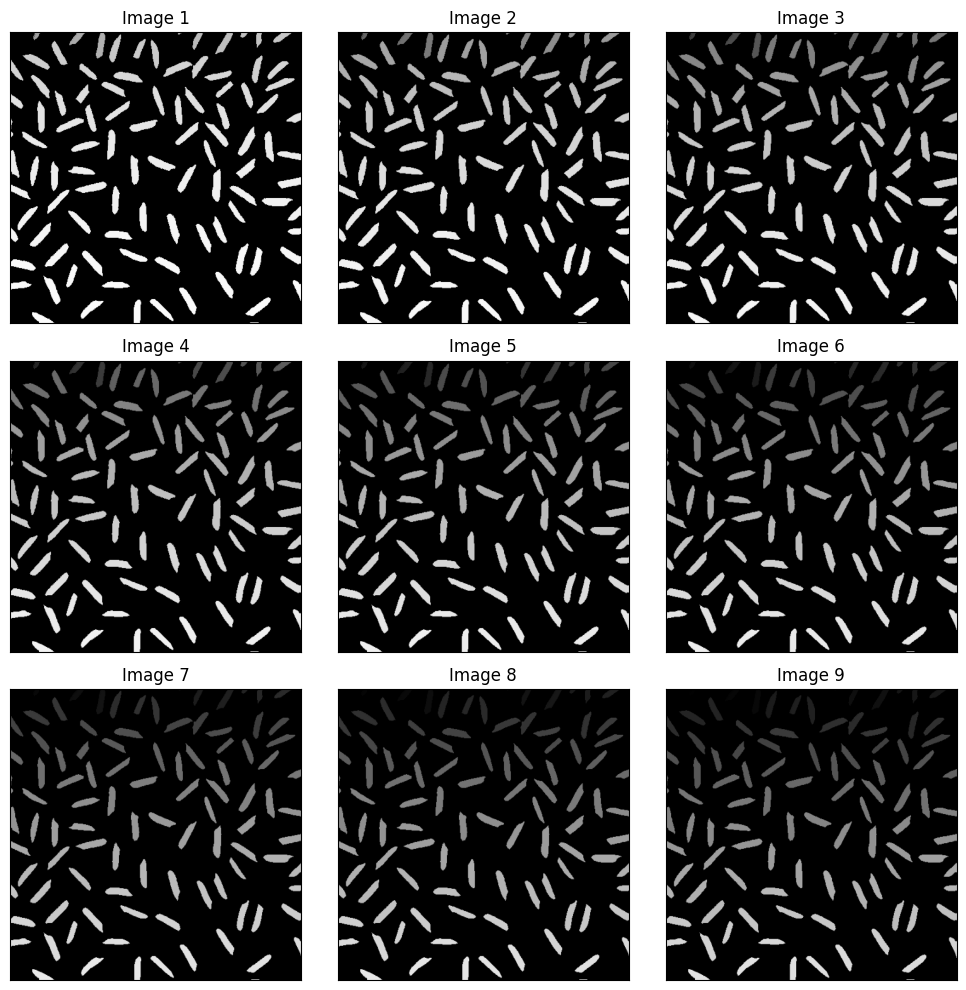

In [23]:
# image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
gray_img_list = []
for i in range(len(img_list)):
    image = cv2.imread(list_path[i])
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_img_list.append(image_gray)

contrast_fac = 3.0
brightness_fac = 40
adjusted_np_image =  cv2.convertScaleAbs(gray_img_list[3], alpha=contrast_fac, beta=brightness_fac)
imgs = []
gammas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for gamma in gammas:
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
        # apply gamma correction using the lookup table
    gamma_image =  cv2.LUT(gray_img_list[3], table)
    imgs.append(gamma_image)
    # cv2.imshow(f'Gamma{} Image', gamma_image)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3,i + 1)
    plt.imshow(imgs[i], cmap='gray',)
    plt.title(f'Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


In [36]:
hist_equal = cv2.equalizeHist(gray_img_list[3])
cv2.imshow('Original Image', gray_img_list[3])
cv2.imshow('HE', hist_equal)


error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [25]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [26]:
# bộ lọc trơn ảnh: lọc nhiễu, làm trơn ảnh
# Bộ lọc trung bình‒Bộ lọc Gauss

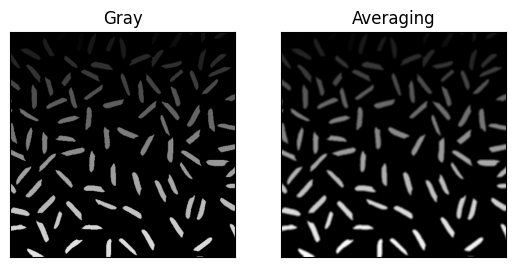

In [27]:
# Averaging filter
# làm mờ ảnh, giảm nhiễu (như nhiễu salt-and-pepper), có thể mất sắc nét
# kernel "trượt" qua ảnh, nó sẽ xác định một vùng gồm các pixel xung quanh pixel trung tâm mà nó đang xử lý.

avg_kernel = np.ones((5,5),np.float64)/25
avg_image = cv2.filter2D(gray_img_list[3], -1, avg_kernel)
cv2.imwrite('ảnh.png',avg_image)

plt.subplot(121),plt.imshow((gray_img_list[3]),cmap = 'gray'),plt.title('Gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(avg_image,cmap = 'gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
# # Gaussian Blurring: removing Gaussian noise from an image.
# blur_image = cv2.GaussianBlur(gray_img_list[3],(5,5),0)    #positive and odd
# cv2.imshow('Gray',gray_img_list[3])
# cv2.imshow('Gaussian', blur_image)

In [31]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [33]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [34]:
# Median: highly effective against salt-and-pepper noise
# central element is always replaced by some pixel value in the image
# reduces the noise effectively, kernel size: a positive odd integer.

In [35]:
median_image = cv2.medianBlur(gray_img_list[3],5)
cv2.imshow('Gray',gray_img_list[3])
cv2.imshow('Gaussian', median_image)


error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [104]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [105]:
# Bilateral filtering: highly effective in noise removal while keeping edges sharp
bil_image = cv2.bilateralFilter(gray_img_list[3],9,75,75)
cv2.imshow('Gray',gray_img_list[3])
cv2.imshow('Bil', bil_image)


In [106]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [107]:
# Bộ lọc làm sắc nét cạnh


In [108]:
# Canny chưa tách được hẳn các hạt dính nhau
canny_image = cv2.Canny(gray_img_list[3],100,200)
cv2.imshow('Gray',gray_img_list[3])
cv2.imshow('Bil', canny_image)


In [109]:
cv2.waitKey(0)
cv2.destroyAllWindows()


In [110]:
# #sobel
# img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
# img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
# img_sobel = img_sobelx + img_sobely

# sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
# sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

# #prewitt
# kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
# kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
# img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
# img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

In [111]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
blur_image = cv2.GaussianBlur(gray_img_list[3],(5,5),0) 
img_prewittx = cv2.filter2D(blur_image, -1, kernelx)
img_prewitty = cv2.filter2D(blur_image, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

cv2.imshow('Gray',gray_img_list[3])
cv2.imshow('Prewitt', img_prewitt)

In [112]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [113]:
laplacian_image = cv2.Laplacian(gray_img_list[3],cv2.CV_64F)
cv2.imshow('Gray',gray_img_list[3])
cv2.imshow('Laplacian', laplacian_image)
# đỉnh

In [114]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [115]:
# binary image

In [116]:
# image thresholding
# simple thresholding, adaptive thresholding and Otsu's thresholding
ret,thresh_tozero = cv2.threshold(gray_img_list[3],127,255,cv2.THRESH_TOZERO)
cv2.imshow('Gray',gray_img_list[3])
cv2.imshow('Bin_Tozero', thresh_tozero)


In [117]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [118]:
# dilation, erosion
# # Định nghĩa kernel  
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  

# # Thực hiện Morphological Dilation  
# dilated = cv2.morphologyEx(image, cv2.MORPH_DILATE, kernel)  

kernel = np.ones((5,5),np.uint8)

dil_image = cv2.dilate(gray_img_list[3],kernel,iterations=1)
ero_image = cv2.erode(gray_img_list[3],kernel,iterations=1)
cv2.imshow('Gray', gray_img_list[3]) 
cv2.imshow('Erosion', ero_image) 
cv2.imshow('Dilation', dil_image) 

In [119]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [120]:
# Connected component labeling 
# Counting objects
# Separating objets 
# Creating a mask for each object

# Có lẽ là mấu chốt giải bài này

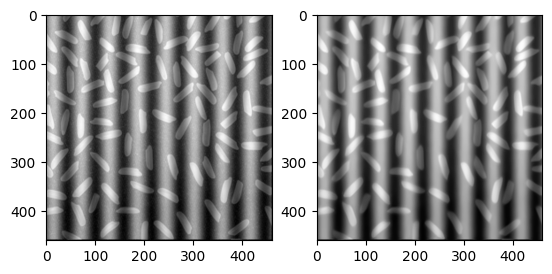

In [121]:
sinus_removal_image = cv2.fastNlMeansDenoising(gray_img_list[0],None,h=10,templateWindowSize=10,searchWindowSize=21)
plt.subplot(121),plt.imshow(gray_img_list[0],cmap='gray')
plt.subplot(122),plt.imshow(sinus_removal_image,cmap='gray')
plt.show()

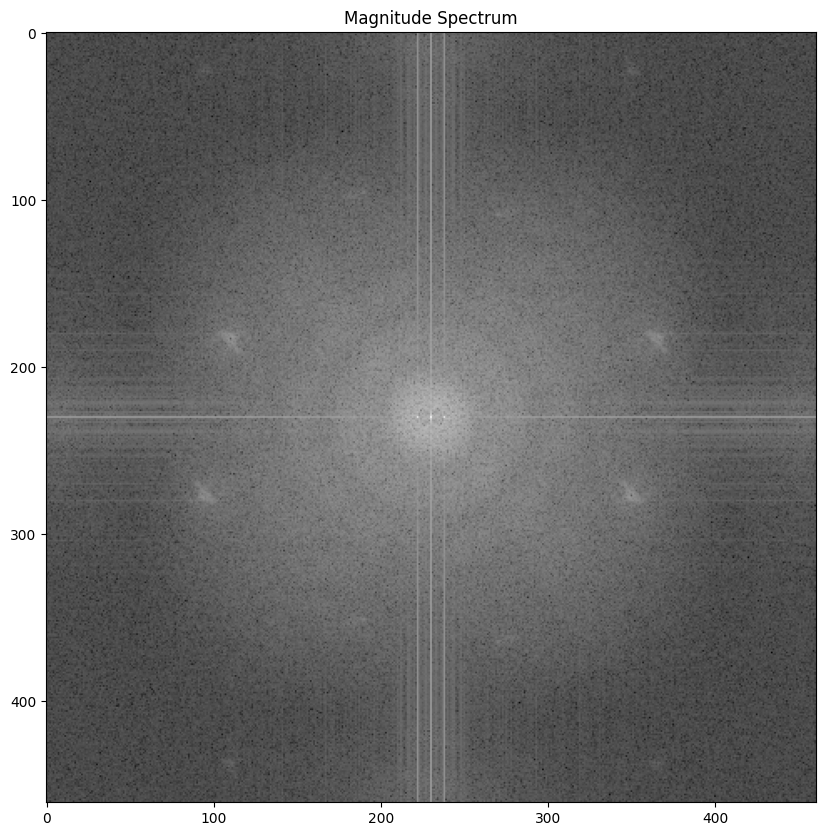

In [122]:
f = np.fft.fft2(gray_img_list[0])
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.figure(figsize=(10, 10))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
# plt.show()
cv2.imshow('B',magnitude_spectrum )

In [123]:
# Create a mask to remove specific frequencies
rows, cols = gray_img_list[0].shape
crow, ccol = rows // 2 , cols // 2

# Set the width of the vertical frequency band to remove
mask = np.ones((rows, cols), np.uint8)
bandwidth =  11 # adjust this depending on stripe width
mask[:, ccol - bandwidth:ccol + bandwidth] = 0

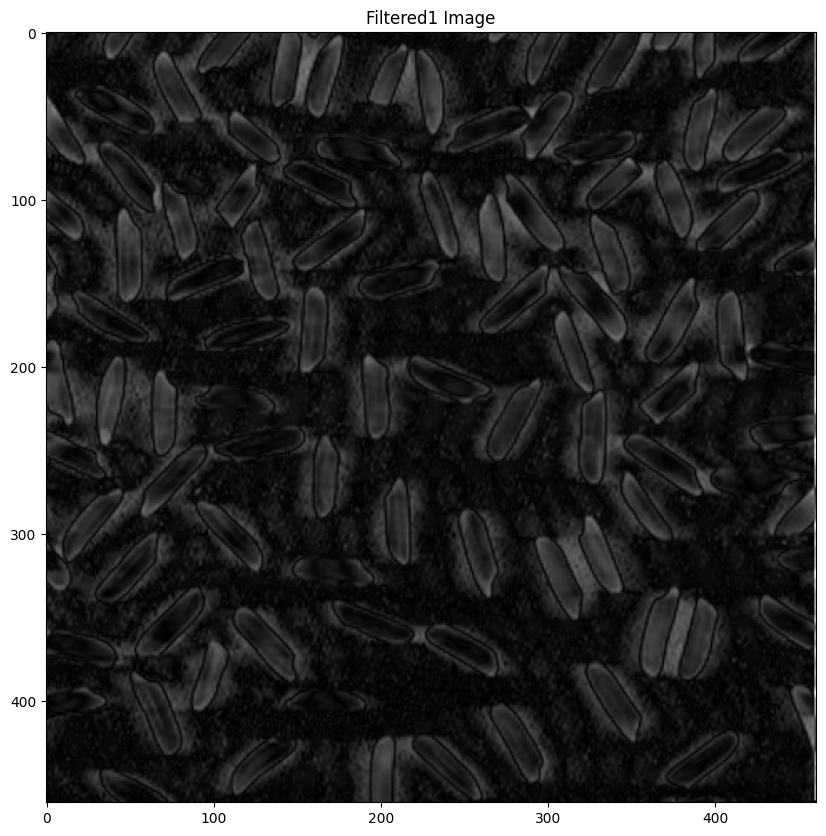

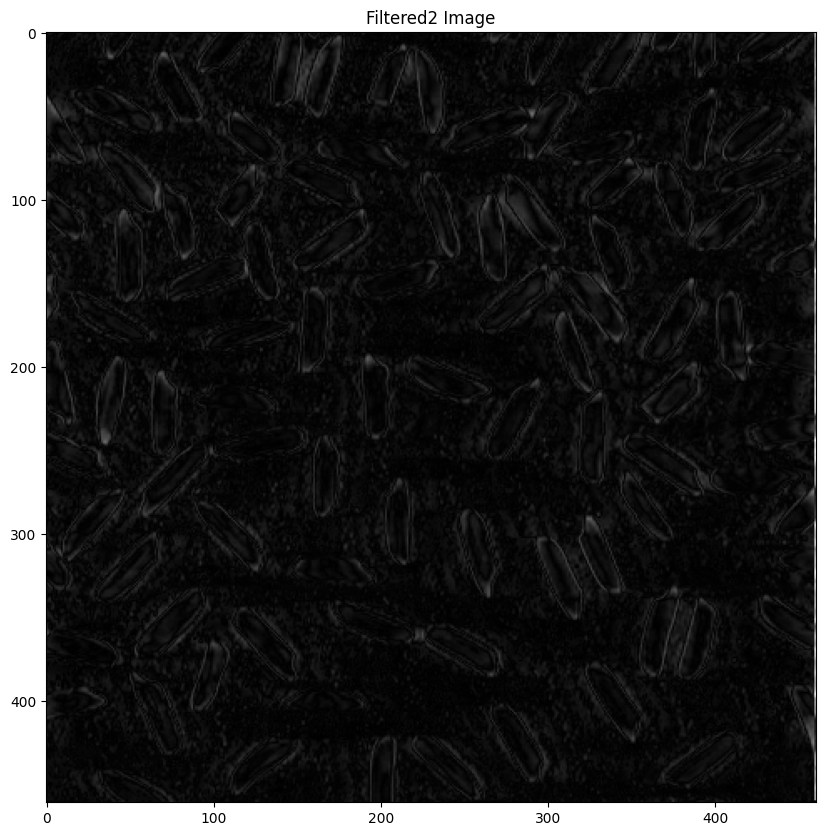

In [124]:
# Apply the mask and inverse FFT
fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(img_back, cmap='gray')
plt.title('Filtered1 Image')
plt.show()


f = np.fft.fft2(img_back)
fshift = np.fft.fftshift(f)
fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back_2 = np.fft.ifft2(f_ishift)
img_back_2 = np.abs(img_back_2)
plt.figure(figsize=(10, 10))
plt.imshow(img_back_2, cmap='gray')
plt.title('Filtered2 Image')
plt.show()